In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
import ipywidgets as widgets
from ipywidgets import interact, fixed, Dropdown, Checkbox, FloatSlider, IntSlider, Output, VBox, HBox

from numpy import cos, sin, tan, arctan, exp, log, pi, array, linspace, arange, sqrt, meshgrid
from numpy.linalg import norm
from mpl_toolkits import mplot3d
from ipykernel.pylab.backend_inline import flush_figures

%matplotlib widget

plt.rcParams['figure.figsize'] = [7.0, 7.0]


# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

# plt.rcParams.update({
#     "text.usetex": True,
# #     "font.family": "serif",
# })

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [2]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

ol li {
    padding: .5em;
}
</style>

# One-minute Review

The **directional derivative** of a differentiable function $f$ in the direction of unit vector $\vec u$ at $\vec x$ is
$$D_{\vec u} f(\vec x) = \lim_{h\to 0}\frac{f(\vec x+h\vec u) - f(\vec x)}{h} = \nabla f(\vec x)\cdot\vec u.$$

3 important properties:
  - $\nabla f$ is orthogonal to level sets.
  - $\nabla f$ points in the direction of greatest change.
  - $|\nabla f|$ is the amount of greatest change.

<p style="padding-bottom:40%;"> </p>

# Lecture 12

  - Objectives
    - Define local minima/maxima.
    - Classify critical points using the second derivative test.
    - Solve unconstrained optimization problems
    
  - Resources
    - Content
      - Stewart: §14.7
      - New Strang: [§4.7](https://openstax.org/books/calculus-volume-3/pages/4-7-maxima-minima-problems)

    - Practice
      - Mooculus: [Minima and Maxima](https://ximera.osu.edu/mooculus/calculus3/maximumsAndMinimumsOfFunctionsOfSeveralVariables/digInMaximaAndMinima)
    - Extras
      - CalcBLUE: [Critical Points](https://youtu.be/J1HS6hmBtC0) 

# Warm-up

Stand up if you are as tall or taller than all the people sitting one seat away from you.



<p style="padding-bottom:40%;"> </p>

<div class="alert alert-block alert-info shadow">
<strong>Definitions</strong>

<p>A <b>local maximum</b> (resp. <b>minimum</b>) of a function occurs at a point with position $\vec x_0$ if there is a radius $r>0$ such that for all $\vec y$ where $|\vec x_0 - \vec y| < r$,  
        
$$f(\vec x_0) \geq f(\vec y) \quad({\rm resp. }f(\vec x_0) \leq f(\vec y)).$$
</p>
    
<p>A <b>global maximum</b> (resp. <b>minimum</b>) of a function occurs at a point with position $\vec x_0$ if for all $\vec y$ in the domain of $f$. 

$$f(\vec x_0) \geq f(\vec y) \quad {\rm resp. }f(\vec x_0) \leq f(\vec y)).$$
</div>


<p style="padding-bottom:40%;"> </p>

![Local pizza max](https://images.squarespace-cdn.com/content/5a451092c027d82d5c32ce60/1514907511830-4JHEGBXRD4D7SX2HG0V1/BestPizzaOnTheBlock.jpg?content-type=image%2Fjpeg)

Note: The local maximum/minimum is actually the _output_ value $f(\vec x_0)$, a scalar, not the location at which it occurs. 

<p style="padding-bottom:40%;"> </p>

<div class="alert alert-block alert-info shadow">
<strong>Definition</strong>
    
A <b>critical point</b> $\vec x$ of a function $f$ is a point in the domain at which the function is not differentiable or $\nabla f(\vec x) = \vec 0$.
</div>

<p style="padding-bottom:40%;"> </p>

## Three Surfaces

At the critical point $(0,0)$, the function given by 

  - $1 - x^2 - y^2$ has a local maximum.
  - $x^2 + y^2$ has a local minimum.
  - $y^2 - x^2$ has a **saddle point** (critical point at which $f$ does not have a local min or max).

In [14]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(11, 5.5))
    plt.ion()
    ax = fig.add_subplot(121, projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)


    f = lambda x,y: 1-y**2-x**2
    g = lambda x,y: y**2+x**2
    h = lambda x,y: y**2-x**2
    
    drop = Dropdown(options={"max": f,"min":g,"saddle":h})
    func = drop.value

    for c in 'xyz':
    #         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    xx = yy = np.linspace(-3/2,3/2,20)
    xx,yy = np.meshgrid(xx,yy)
    ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
    
    def update(change):
        func = drop.value
        while ax.collections:
            ax.collections.pop()
        ax2.clear()
        Z = func(X,Y)
        ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
        cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
        ax2.set_xlabel("$x$",size=16)
        ax2.set_ylabel("$y$",size=16)
        ax2.clabel(cp,fmt="%.1f")
        xx = yy = np.linspace(-3/2,3/2,20)
        xx,yy = np.meshgrid(xx,yy)
        ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
        
    drop.observe(update, names='value')
    
    return widgets.VBox([drop, fig.canvas])

a("Three critical points")

### Examples

For each plot below, sketch the gradient field, identify critical points, and mark them as having a local max, local min, or neither. 

In [15]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(11, 5.5))
    plt.ion()
    ax = fig.add_subplot(121, projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)


    f = lambda x,y: 20*exp(-(x**2 + y**2)) - 15* exp(-2 *((x - 1)**2 + (y - 3/4)**2)) - 18 *exp(-2 *((x - 1)**2 + (y + 1/2)**2))
    g = lambda x,y: 10*x**2
    h = lambda x,y: 20*((x - 1)**2 - y**2/2) 
    k = lambda x,y: 20*exp(-1/2*((x - 1/4)**2 + (y + 1/3)**2))*sin(5*x)*cos(7*y)
    
    drop = Dropdown(options={"f": f,"g":g,"h":h,"k":k})
    func = drop.value
    
    check1 = Checkbox(description="graph", value=False)
    graph = check1.value    
    check2 = Checkbox(description="gradient", value=False)
    quiver = check2.value

    for c in 'xy':
        getattr(ax,f"set_{c}lim")([-3/2,3/2]);    
        
    getattr(ax,f"set_zlabel")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    # ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    xx = yy = np.linspace(-3/2,3/2,20)
    xx,yy = np.meshgrid(xx,yy)
    # ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
    
    def update(change):
        func = drop.value
        graph = check1.value
        quiver = check2.value
        while ax.collections:
            ax.collections.pop()
        ax2.clear()
        Z = func(X,Y)
        if graph:
            ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
        cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
        ax2.set_xlabel("$x$",size=16)
        ax2.set_ylabel("$y$",size=16)
        ax2.clabel(cp,fmt="%.1f")
        if quiver:
            ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
        
    drop.observe(update, names='value')
    check1.observe(update, names='value')
    check2.observe(update, names='value')
    
    return widgets.VBox([HBox([drop, check1, check2]), fig.canvas])

a("More examples")

<p style="padding-bottom:40%;"> </p>

## Exercise

Find all critical points of the function below.

$$f(x,y) = x^4+y^4-4x y+1$$

<p style="padding-bottom:40%;"> </p>

## Recall

In one-variable calculus, how did one determine if a critical point held a local min, local max or neither?

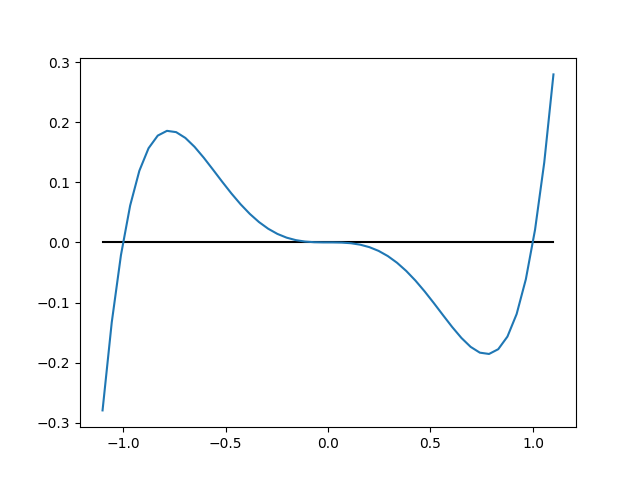

In [5]:
x = np.linspace(-1.1,1.1)
plt.figure("A 1D graph")
plt.plot([-1.1,1.1],[0,0],'k')
plt.plot(x,x**5-x**3);
# plt.show()

<p style="padding-bottom:40%;"> </p>

<div class="alert alert-block alert-success shadow">
<h3>The Second Derivative Test</h3>

If all 2nd order partials of $f(x,y)$ are continuous in the neighborhood of a critical point $(a,b)$, let 
$$ D = f_{xx}(a,b)f_{yy}(a,b) - (f_{xy}(a,b))^2  = 
\begin{vmatrix} 
\frac{\partial ^2 f}{\partial x^2} & \frac{\partial ^2 f}{\partial y \partial x} \\
\frac{\partial ^2 f}{\partial x \partial y} & \frac{\partial ^2 f}{\partial y^2} 
\end{vmatrix}.$$

Then, 
<ul>
    <li> if $D>0$ and $f_{xx} < 0$, $f(a,b)$ is a local maximum.</li>
    <li>if $D>0$ and $f_{xx} > 0$, $f(a,b)$ is a local minimum.</li>
    <li>if $D<0$, $(a,b)$ is a saddle point. </li>
</ol>
Otherwise, the test is inconclusive.
</div>



<p style="padding-bottom:40%;"> </p>

## How does it work?

Consider the "concavity" of the function along the "line with slope $m$": $$\vec r(t) = \langle t, m t\rangle.$$

Compute $\frac{d^2}{dt^2}f \circ r(t)$. 

In [17]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(11, 5.5))
    plt.ion()
    ax = fig.add_subplot(121, projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)


    f = lambda x,y: 1-y**2-x**2
    g = lambda x,y: y**2+x**2
    h = lambda x,y: y**2-x**2
    
    drop = Dropdown(options={"max": f,"min":g,"saddle":h})
    func = drop.value

    slider = FloatSlider(min=0, max=pi, step=pi/180, value=0, description="slope", readout=False)
    m = slider.value
    
    for c in 'xyz':
    #         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    xx = yy = np.linspace(-3/2,3/2,20)
    xx,yy = np.meshgrid(xx,yy)
    ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)

    t = linspace(-1.5, 1.5, 150)
    bump_pl = ax.plot(t*cos(m),t*sin(m),func(t*cos(m),t*sin(m)),lw=3,color='r')[0]
    flat_pl = ax2.plot(t*cos(m),t*sin(m),lw=3,color='r')[0]

    
    def update(change):
        func = drop.value
        m = slider.value

        while ax.collections:
            ax.collections.pop()
        while ax2.collections:
            ax2.collections.pop()
        while ax2.texts:
            ax2.texts.pop()        
        Z = func(X,Y)
        ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
        cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
        ax2.set_xlabel("$x$",size=16)
        ax2.set_ylabel("$y$",size=16)
        ax2.clabel(cp,fmt="%.1f")
        ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
        bump_pl.set_data_3d(t*cos(m),t*sin(m),func(t*cos(m),t*sin(m)))
        flat_pl.set_data(t*cos(m),t*sin(m))


    def update_curve(change):
        m = slider.value
        func = drop.value
        bump_pl.set_data_3d(t*cos(m),t*sin(m),func(t*cos(m),t*sin(m)))
        flat_pl.set_data(t*cos(m),t*sin(m))
        
    drop.observe(update, names='value')
    slider.observe(update_curve, names='value')
    
    return widgets.VBox([HBox([drop, slider]), fig.canvas])

a("Three critical points")

<p style="padding-bottom:40%;"> </p>

## Exercise

Use the second derivative test to classify the critical points $(-1,-1)$,$(0,0)$, and $(1,1)$ in the example above.

$$f(x,y) = x^4+y^4-4x y+1$$

In [16]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(11, 5.5))
    plt.ion()
    ax = fig.add_subplot(121, projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)


    f = lambda x,y: x**4+y**4-4*x *y+1
    g = lambda x,y: 10*x**2
    h = lambda x,y: 20*((x - 1)**2 - y**2/2) 
    k = lambda x,y: 20*exp(-1/2*((x - 1/4)**2 + (y + 1/3)**2))*sin(5*x)*cos(7*y)
    
    drop = Dropdown(options={"f": f,"g":g,"h":h,"k":k})
    func = drop.value
    
    check1 = Checkbox(description="graph", value=False)
    graph = check1.value    
    check2 = Checkbox(description="gradient", value=False)
    quiver = check2.value

    for c in 'xy':
        getattr(ax,f"set_{c}lim")([-3/2,3/2]);    
        
    getattr(ax,f"set_zlabel")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    # ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    xx = yy = np.linspace(-3/2,3/2,20)
    xx,yy = np.meshgrid(xx,yy)
    # ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
    
    def update(change):
        func = drop.value
        graph = check1.value
        quiver = check2.value
        while ax.collections:
            ax.collections.pop()
        ax2.clear()
        Z = func(X,Y)
        if graph:
            ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
        cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
        ax2.set_xlabel("$x$",size=16)
        ax2.set_ylabel("$y$",size=16)
        ax2.clabel(cp,fmt="%.1f")
        if quiver:
            ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
        
    drop.observe(update, names='value')
    check1.observe(update, names='value')
    check2.observe(update, names='value')
    
    return widgets.VBox([HBox([check1, check2]), fig.canvas])

a("More examples")

<p style="padding-bottom:40%;"> </p>

# A (very) little topology

Let $S$ be a set in $\RR^n$ and $\vec p$ be the position of a point in it.  (We can be lazy and say $\vec p \in S$.)

$\vec p$ is an **interior point** of $S$ if there exists a positive radius $r>0$ such that for all $|\vec y - \vec p| < r$, $\vec y \in S$.

$\vec p$ is a **boundary point** of $S$ if for every $r>0$, there are points $\vec y_1$ and $\vec y_2$ with $|\vec y_i - \vec p| < r$ such that $\vec y_1 \in S$ and $\vec y_2 \notin S$.

<p style="padding-bottom:40%;"> </p>

#### Quick Example

Let $S\subset \RR^2$ be the unit disk. $\left(1/2,\sqrt{3}/2\right)$ is a boundary point. $(1/2,1/2)$ is an interior point.

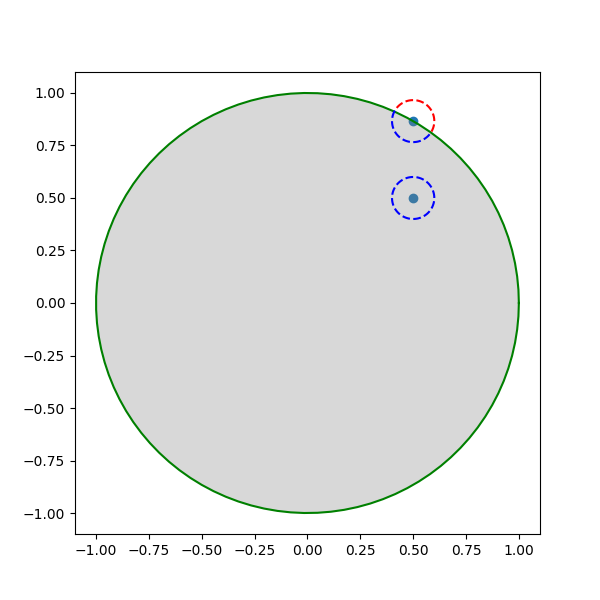

In [8]:
t = np.linspace(0,np.pi*2,100)
plt.figure("Interior/Boundary", figsize=(6,6))
plt.scatter((1/2,1/2),(1/2,sqrt(3)/2))
plt.fill(cos(t),sin(t),'gray',alpha=.3)
plt.plot(cos(t),sin(t),'-g',1/10*cos(t)+1/2,1/10*sin(t)+1/2,'--b')
t=np.linspace(-pi/6,5*pi/6,50)
plt.plot(1/10*cos(t)+1/2,1/10*sin(t)+sqrt(3)/2,'--r',-1/10*cos(t)+1/2,-1/10*sin(t)+sqrt(3)/2,'--b');

<p style="padding-bottom:40%;"> </p>

## Definitions 

A set $S$ is **open** if all points are interior points.

A set $S$ is **closed** if it contains all its boundary points.

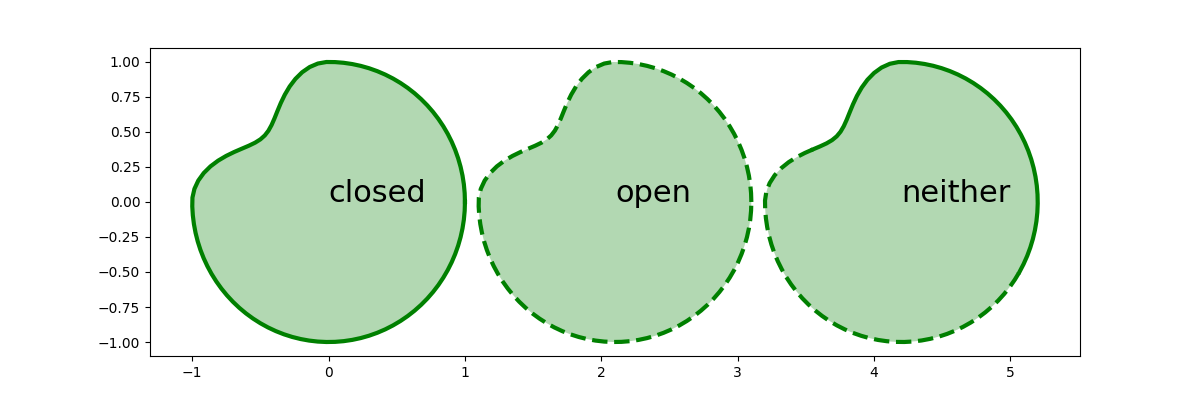

In [9]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(figsize=(12,4),num=TITLE)
    plt.ion()
    
    def rr(t):
        if pi/2 < t < pi:
            return 2/3+1/3*cos(2*t)**2
        else:
            return 1.

    rr = np.vectorize(rr)

    t = np.linspace(0,np.pi*2,100)
    plt.fill(rr(t)*cos(t),rr(t)*sin(t),'g',alpha=.3)
    plt.plot(rr(t)*cos(t),rr(t)*sin(t),'-g',2.1+rr(t)*cos(t),rr(t)*sin(t),'--g',lw=3)
    plt.fill(rr(t)*cos(t)+2.1,rr(t)*sin(t),'g',alpha=.3)
    plt.fill(rr(t)*cos(t)+2*2.1,rr(t)*sin(t),'g',alpha=.3)
    t=np.linspace(-pi/6,5*pi/6,50)
    plt.plot(4.2+rr(t)*cos(t),rr(t)*sin(t),'-g',4.2+rr(t+pi)*cos(t+pi),rr(t+pi)*sin(t+pi),'--g',lw=3);
    plt.text(2.1,0,"open",fontsize=22);
    plt.text(4.2,0,"neither",fontsize=22);
    plt.text(0,0,"closed",fontsize=22);
    

    return fig.canvas

a("Open/Closed")

<p style="padding-bottom:40%;"> </p>

# Optimization


### Theorem (Fermat, I guess)

If a local maximum or minimum of a function $f:D\to \RR$ occurs at an interior point $\vec p$, then $\vec p$ is a critical point of $f$. 

### Extreme Value Theorem

If $D\in \RR^n$ is closed and bounded and $f:D\to \RR$ is continuous, then there is an $\vec x \in D$ such that $f(\vec x)$ is the **global maximum**. That is, $f(\vec y) \leq f(\vec x)$.  

The same holds for the global minimum, mutatis mutandis. 

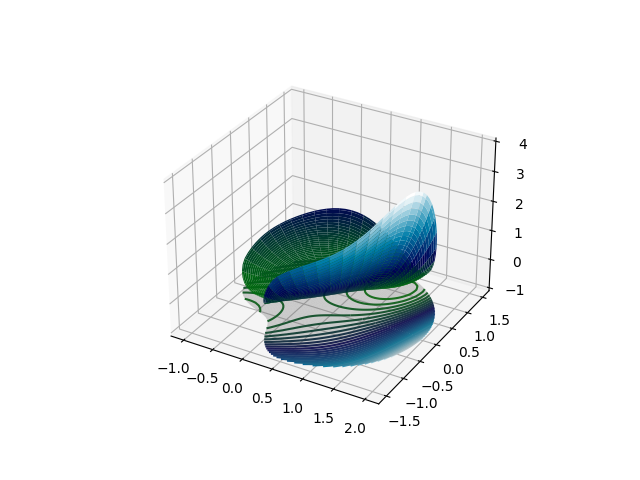

In [10]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d')
    
    def rr(t):
        if pi/2 < t < pi:
            return 2/3+1/3*cos(2*t)**2
        else:
            return 1.

    rr = np.vectorize(rr)

    th = linspace(0,2*pi,100)
    r = linspace(0,1,100)
    r,th = meshgrid(r,th)
    X = 3/2*r * rr(th-pi/2) *cos(th) + 1/2
    Y = 3/2*r * rr(th-pi/2) *sin(th)
    Z = X**4 + Y**4 - 4*X*Y - 1
    ax.plot_surface(X,Y,0*Z - 1,color='gray',alpha=.3)
    ax.plot_surface(X,Y,Z/4,cmap='ocean')
    ax.contour(X,Y,Z/4,offset=-1,levels=32,cmap='ocean')
    ax.set_zlim(-1,4)
    
    
    return fig.canvas

a("Global mins/maxes")

[3Demos version](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&obj0_kind=curve&obj0_params_a=0&obj0_params_b=2*pi&obj0_params_x=1%2F2+%2B+3%2F2%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+cos%28t%29&obj0_params_y=3%2F2%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+sin%28t%29&obj0_params_z=0&obj0_params_tau=0&obj1_kind=curve&obj1_params_a=0&obj1_params_b=2*pi&obj1_params_x=1%2F2+%2B+3%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+cos%28t%29&obj1_params_y=3%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+sin%28t%29&obj1_params_z=%28%281%2F2+%2B+3%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+cos%28t%29%29%5E4+%2B+%283%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+sin%28t%29%29%5E4+-+4*%281%2F2+%2B+3%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+cos%28t%29%29*%283%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+sin%28t%29%29+-+1%29+%2F10+%2B+.5&obj1_params_tau=0&obj2_kind=graph&obj2_params_a=-1&obj2_params_b=2&obj2_params_c=-3%2F2&obj2_params_d=3%2F2&obj2_params_z=%28x%5E4+%2B+y%5E4+-+4*x*y+-+1%29+%2F10+%2B+.5&obj2_params_tau=0&obj2_params_t0=0&obj2_params_t1=1)

<p style="padding-bottom:40%;"> </p>

## Consequences

When trying to find the absolute extrema of a function $f$ on a set $D$, 
  - Find all critical points of $f$ in $D$ (unconstrained optimization). 
  - Find the extremes on the boundary of $D$ (next time).

## Exercise

  Find the point on the plane $z = x -2y + 3$ closest to the origin.
  

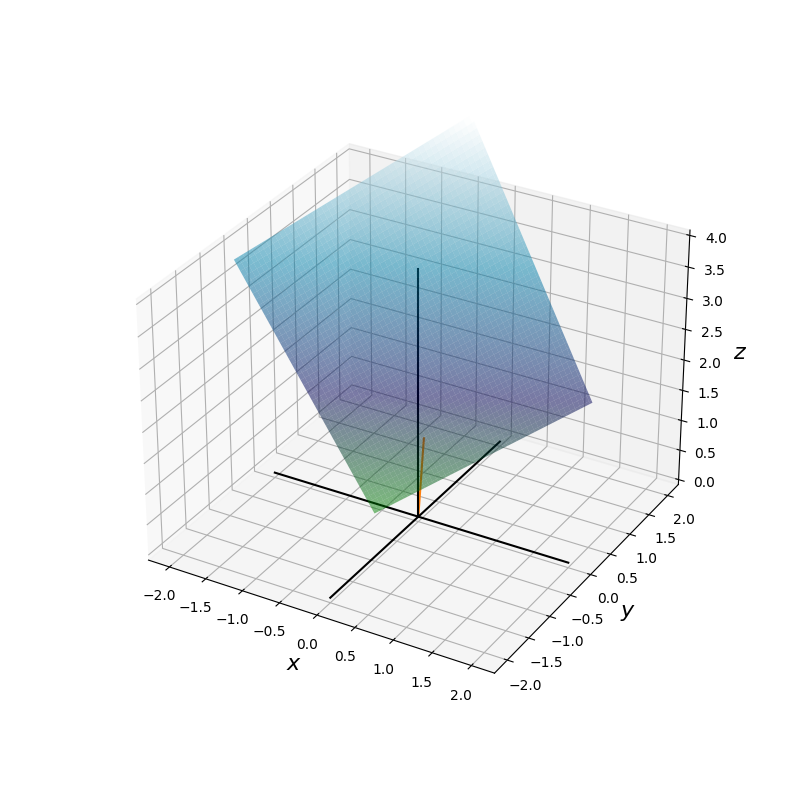

In [13]:
def a():
    fig= plt.figure(figsize=(8,8),dpi=100)
    ax = fig.add_subplot(projection='3d')
    x = y = np.linspace(-3/2,3/2,100)
    x,y = np.meshgrid(x,y)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.plot_surface(x,y,x - 2*y + 3,alpha=.5,cmap="ocean")
    ax.set_zlim3d([0,4])
    ax.plot([0,-1/2],[0,1],[0,1/2])
    ax.plot([0,0],[0,0],[0,4],'k')
    ax.plot([0,0],[-2,2],[0,0],'k')
    ax.plot([-2,2],[0,0],[0,0],'k');

a()